### Creating Fig 4

In [2]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score
from scipy.stats.stats import pearsonr
from sklearn.metrics import mean_squared_error
import statistics
import numpy
import seaborn as sns
import numpy as np
import os
os.chdir('../')

# Reset default params
sns.set()

import matplotlib.pyplot as plt
# plt.style.use('seaborn-deep')




In [36]:
experiment='fanancial'
if experiment=='demantia':
    df_expert=pd.read_csv("input_dementia/labeled_data_idea.csv")
    df= pd.read_csv('input/Batch_4176044_batch_results.csv')
elif experiment=='renewableenergy': 
    df_expert=pd.read_csv("input_renewableenergy/labeled_data_idea.csv")
    df= pd.read_csv('input/Batch_renewableenergy_crowd.csv')
elif experiment=='fanancial':
    df_expert=pd.read_csv("input_fanancial_emp/labeled_data_idea.csv")
    df= pd.read_csv('input/Batch_fanancialempowerment_crowd.csv')

In [37]:
df_expert.head(2)

,Id,title,idea,rating,labels,labels_viability,labels_feasibility,labels_desirability,final_feedback
0,307FVKVSYRR8HRWW1OKE4F5QRC047R,307FVKVSYRR8HRWW1OKE4F5QRC047R,Community endowments create wealth from inves...,0,3,4,4,1,0
1,307FVKVSYRR8HRWW1OKE4F5QRC074U,307FVKVSYRR8HRWW1OKE4F5QRC074U,Collaboration and expansion of possible ventu...,0,1,1,1,1,0


In [38]:
df.head(2)

,HITId,HITTypeId,Title,Description,Keywords,Reward,CreationTime,MaxAssignments,RequesterAnnotation,AssignmentDurationInSeconds,...,Input.variable_name,Answer.Desirable,Answer.clarityreason,Answer.desirabilityreason,Answer.feasibilereason,Answer.feasible,Answer.overall,Answer.viability,Approve,Reject
0,3FTID4TN8LANUJZIUP9V39RYHX4LY2,31L8DLROGDVTRXLCJJEDMJAVGLZA0O,Rating ideas based on some criteria,In this survey we present a few ideas from a g...,"survey, rating",$0.40,Mon Oct 12 09:02:46 PDT 2020,2,BatchId:4215578;OriginalHitTemplateId:928390912;,3600,...,<h2>UPDATE: Communities as an alternative- rew...,4,Hard to know without additional information.,Many people enjoy socializing (virtually or in...,Hard to know without additional information.,3,4,3,NaN,NaN
1,3FTID4TN8LANUJZIUP9V39RYHX4LY2,31L8DLROGDVTRXLCJJEDMJAVGLZA0O,Rating ideas based on some criteria,In this survey we present a few ideas from a g...,"survey, rating",$0.40,Mon Oct 12 09:02:46 PDT 2020,2,BatchId:4215578;OriginalHitTemplateId:928390912;,3600,...,<h2>UPDATE: Communities as an alternative- rew...,3,it would depend on the outcome of people and w...,i believe there are already similar programs,testing has to be carried out first,3,3,3,NaN,NaN


In [39]:
df3=df.groupby("HITId").agg({"HITId":"last","Answer.Desirable":"mean", "Answer.feasible":"mean", "Answer.overall":"mean","Answer.viability":"mean","Input.variable_name":"last"}).reset_index(drop=True)
list_desirability_3=[]
list_feasibility_3=[]
list_viability_3=[]
list_overall_3=[]

list_desirability_expert=[]
list_feasibility_expert=[]
list_viability_expert=[]
list_overall_expert=[]
list_ids=[]
for index, row in df3.iterrows():
    temp=df_expert[df_expert['Id'] == row['HITId']]['labels_desirability'].values
    if temp!=None:

        list_desirability_expert.append(temp[0])
        list_ids.append(row['HITId'])
        temp = df_expert[df_expert['Id'] == row['HITId']]['labels_feasibility'].values
        list_feasibility_expert.append(temp[0])
        temp = df_expert[df_expert['Id'] == row['HITId']]['labels_viability'].values
        list_viability_expert.append(temp[0])
        temp = df_expert[df_expert['Id'] == row['HITId']]['labels'].values
        list_overall_expert.append(temp[0])
        
        
        list_desirability_3.append(row["Answer.Desirable"])
        list_feasibility_3.append(row["Answer.feasible"])
        list_viability_3.append(row["Answer.viability"])
        list_overall_3.append(row["Answer.overall"])




<ipython-input-39-5debf6c1f81f>:14: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if temp!=None:


In [40]:
df3.head(2)

,HITId,Answer.Desirable,Answer.feasible,Answer.overall,Answer.viability,Input.variable_name
0,307FVKVSYRR8HRWW1OKE4F5QRC047R,4.0,4.0,3.5,3.0,<h2>Community Endowments: the trifecta of part...
1,307FVKVSYRR8HRWW1OKE4F5QRC074U,4.0,4.0,3.5,3.0,<h2>Empowering community through Microfinance ...


2.6111648393354674
1.7240134054647667
0.9546152746424316
0.9420721840708386
2.5


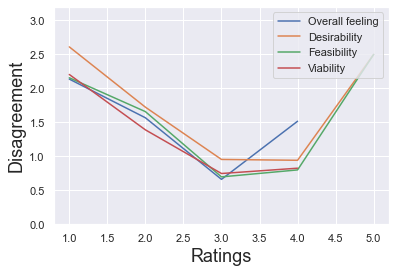

In [41]:
from math import sqrt

X_desirability=[]
y_desirability=[]
X_feasibility=[]
y_feasibility=[]
X_viability=[]
y_viability=[]
X_overall=[]
y_overall=[]
y_lenght=[]
    
for rate in [1,2,3,4,5]:
    index=[i for i, e in enumerate(list_desirability_expert) if e == rate]

    exp_1=[]
    crowd_1=[]
    len_1=[]
    for ii in index:
        exp_1.append(list_desirability_expert[ii])
        crowd_1.append(list_desirability_3[ii])

    print(sqrt(mean_squared_error(exp_1,crowd_1)))
    X_desirability.append(rate)
    y_desirability.append(sqrt(mean_squared_error(exp_1,crowd_1)))
    
    index=[i for i, e in enumerate(list_feasibility_expert) if e == rate]

    exp_1=[]
    crowd_1=[]
    for ii in index:
        exp_1.append(list_feasibility_expert[ii])
        crowd_1.append(list_feasibility_3[ii])

    X_feasibility.append(rate)
    y_feasibility.append(sqrt(mean_squared_error(exp_1,crowd_1)))
    try:
    
        index=[i for i, e in enumerate(list_viability_expert) if e == rate]

        exp_1=[]
        crowd_1=[]
        for ii in index:
            exp_1.append(list_viability_expert[ii])
            crowd_1.append(list_viability_3[ii])

        y_viability.append(sqrt(mean_squared_error(exp_1,crowd_1)))
        X_viability.append(rate)
        
    except:
        pass
    try:
    
        index=[i for i, e in enumerate(list_overall_expert) if e == rate]

        exp_1=[]
        crowd_1=[]
        for ii in index:
            exp_1.append(list_overall_expert[ii])
            crowd_1.append(list_overall_3[ii])

        
        y_overall.append(sqrt(mean_squared_error(exp_1,crowd_1)))
        X_overall.append(rate)
        
    except:
        pass



###########################################

plt.plot(X_overall, y_overall, label='Overall feeling' )
plt.plot(X_desirability, y_desirability, label='Desirability')
plt.plot(X_feasibility, y_feasibility, label='Feasibility')
plt.plot(X_viability, y_viability, label='Viability')

plt.ylim(0,3.2)
plt.legend(loc='upper right')
plt.xlabel('Ratings', fontsize=18)
plt.ylabel('Disagreement', fontsize=18)
plt.show()